# Testing the Asfgrid code

## Tomorrow:
- Set up a routine to:
 - Find Radius
 - Compare radius to Yu radius
 - Calculate appropriate error
 - Compare error to Yu error
 - Incorporate into existing structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('axes',labelsize=15)
import os
import pandas as pd

In [2]:
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

def read_data():
    '''Reads in the Yu et al. 2018 data'''
    sfile = __datdir__+'rcxyu18.csv'
    df = pd.read_csv(sfile)
    return df

In [3]:
df = read_data()
tempdiff = 0.

In [4]:
from omnitool.literature_values import Av_coeffs
from omnitool import scalings
SC = scalings(df, df.numax, df.dnu, df.Teff + tempdiff,
                _numax_err = df.numax_err, _dnu_err = df.dnu_err, _Teff_err = df.Teff_err)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Lets load in the asfgrid functions and try to get it working

In [5]:
import sys
sys.path.append('/home/oliver/PhD/Hacks_and_Mocks/asfgrid/')
import asfgrid

In [6]:
print(list(df))

['KICID', 'kepmag_x', 'Length_Quarters', 'Length_days', 'numax', 'numax_err', 'dnu', 'dnu_err', 'amplitude', 'err.2_x', 'fwhm', 'err.3_x', 'maxbg', 'err.4_x', 'Unnamed: 14', 'Teff', 'Teff_err', 'yu_logg', 'yu_logg_err', '[Fe/H]', 'err.2_y', 'M_noCorrection', 'M_noCorrection_err', 'R_noCorrection', 'R_noCorrection_err', 'M_RGB', 'M_RGB_err', 'R_RGB', 'R_RGB_err', 'M_Clump', 'M_Clump_err', 'R_Clump', 'R_Clump_err', 'stage', 'Unnamed: 20', 'designation', 'source_id', 'gaia_ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_me

In [49]:
evstate = np.ones(len(df))*2
logz = np.log10(df.Z.values)
feh = df['[Fe/H]'].values
teff = df.Teff.values
dnu = df.dnu.values
numax = df.numax.values

s = asfgrid.Seism()

outside interp range 119  out of  5578


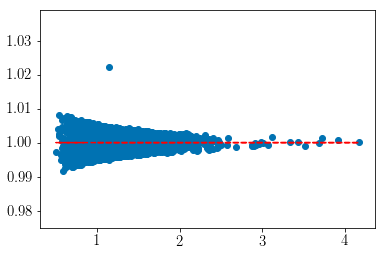

In [50]:
#Calculate Mass, Radius
mass, radius = s.get_mass_radius(evstate, feh , teff, dnu, numax, isfeh=True)
plt.scatter(mass, df.M_Clump/mass)
plt.plot(mass, np.ones(len(mass)), c='r', linestyle='--')
plt.show()

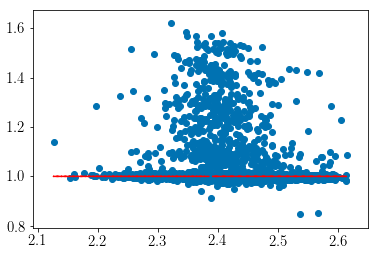

In [51]:
#Calculate logg
logg = s.numax2logg(numax, teff)
plt.scatter(logg, df.logg/logg)
plt.plot(logg, np.ones(len(logg)), c='r', linestyle='--')
plt.show()

outside interp range 361  out of  5578


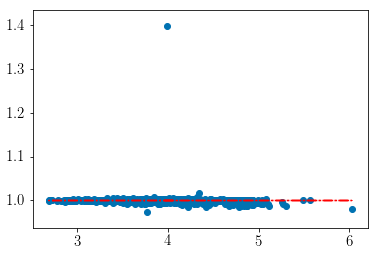

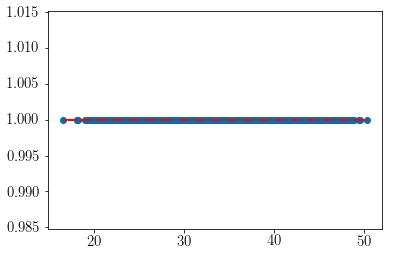

In [54]:
#Get fdnu
dnu0, numax0, fdnu = s.get_dnu_numax(evstate, logz, teff, mass, mass, logg)
plt.scatter(dnu, dnu0/dnu)
plt.plot(dnu, np.ones(len(dnu)),c='r', linestyle='-.')
plt.show()
plt.scatter(numax, numax0/numax)
plt.plot(numax, np.ones(len(dnu)),c='r', linestyle='-.')
plt.show()